In [1]:
import camelot as cm
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [2]:
base_educacion = pd.read_csv( r'../outcomes/base_completa_panel.csv')
base_educacion

Unnamed: 0      dni  period  FC1  FC10  FC100  FC101  FC102  FC103  \
0              0   940893     1.0  NaN   NaN    NaN    NaN    NaN    NaN   
1              0   940893     2.0  NaN   NaN    NaN    NaN    NaN    NaN   
2              1   961093     1.0  NaN   NaN    NaN    NaN    NaN    NaN   
3              2   961093     2.0  NaN  15.0    NaN    NaN    NaN    NaN   
4              3  7469182     1.0  NaN   NaN    NaN    NaN    NaN    NaN   
...          ...      ...     ...  ...   ...    ...    ...    ...    ...   
3107        2287  9286729     2.0  NaN   NaN    NaN    NaN    NaN    NaN   
3108        2288  9694083     1.0  NaN   NaN    NaN    NaN    NaN    NaN   
3109        2288  9694083     2.0  NaN   NaN    NaN    NaN    NaN    NaN   
3110        2289  9713377     1.0  NaN   NaN    NaN    NaN    NaN    NaN   
3111        2289  9713377     2.0  NaN   NaN    NaN    NaN    NaN    NaN   

      FC104  ...  rate_approv   w_fc  w_gc  t_cre_fc  t_cre_gc     ave_gc  \
0       NaN  ...          NaN    NaN   NaN       NaN       NaN        NaN   
1       NaN  ...     1.000000  236.0  87.0      16.0       6.0  14.500000   
2       NaN  ...     1.000000  311.0  73.5      23.0       4.5  16.333333   
3       NaN  ...     1.000000  260.0  64.5      18.0       4.5  14.333333   
4       NaN  ...     0.833333  206.0  58.5      16.0       4.5  13.000000   
...     ...  ...          ...    ...   ...       ...       ...        ...   
3107    NaN  ...     1.000000  245.0  90.0      17.0       5.5  16.363636   
3108    NaN  ...          NaN    NaN   NaN       NaN       NaN        NaN   
3109    NaN  ...     1.000000  267.0  91.5      17.0       5.5  16.636364   
3110    NaN  ...          NaN    NaN   NaN       NaN       NaN        NaN   
3111    NaN  ...     1.000000  224.0  85.5      16.0       6.0  14.250000   

         ave_fc  ave_total   id  signup  
0           NaN        NaN  NaN       0  
1     14.750000  14.681818  1.0       1  
2     13.521739  13.981818  2.0       1  
3     14.444444  14.422222  2.0       1  
4     12.875000  12.902439  1.0       1  
...         ...        ...  ...     ...  
3107  14.411765  14.888889  1.0       1  
3108        NaN        NaN  NaN       0  
3109  15.705882  15.933333  1.0       1  
3110        NaN        NaN  NaN       0  
3111  14.000000  14.068182  1.0       1  

[3112 rows x 287 columns]

In [3]:
# Non first and sith section students

base_educacion = base_educacion[(base_educacion.section != 1) & (base_educacion.section != 6)]

base_educacion[['ave_gc', 'ave_fc', 'ave_total','rate_approv']][base_educacion.period == 1].describe()


ave_gc      ave_fc   ave_total  rate_approv
count  766.000000  771.000000  775.000000   775.000000
mean    14.262489   13.812816   13.915330     0.915844
std      3.454801    3.554707    3.401791     0.214365
min      0.000000    0.000000    0.000000     0.000000
25%     14.000000   13.727778   13.788889     1.000000
50%     15.000000   14.666667   14.744186     1.000000
75%     16.000000   15.589474   15.574468     1.000000
max     18.400000   18.666667   18.400000     1.000000

In [4]:
base_educacion[['ave_gc', 'ave_fc', 'ave_total','rate_approv']][base_educacion.period == 2].describe()

ave_gc      ave_fc   ave_total  rate_approv
count  743.000000  747.000000  751.000000   751.000000
mean    12.156046   12.085022   12.125622     0.788591
std      5.893953    5.798724    5.713523     0.363949
min      0.000000    0.000000    0.000000     0.000000
25%      9.954545   11.656863   11.534884     0.750000
50%     15.000000   14.625000   14.733333     1.000000
75%     16.000000   15.583591   15.602326     1.000000
max     18.000000   19.000000   18.088889     1.000000

### Lower average grade neither general, field course or final grade, besides grades show greater dispersion in 2020-1 semester

Text(0.5, 0, '')

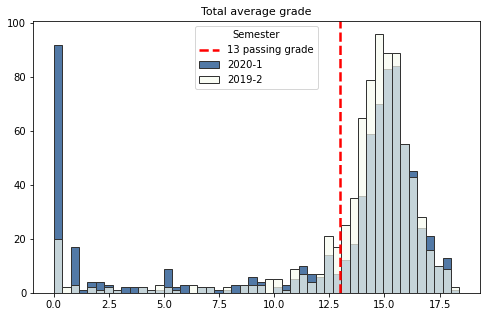

In [5]:
fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base_educacion,
            x = 'ave_total',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )
plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 passing grade','2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Total average grade', size=11)
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0, '')

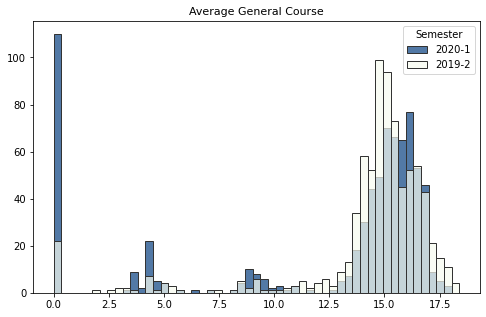

In [6]:
fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data =base_educacion,
            x = 'ave_gc',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )

plt.legend(labels=['2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Average General Course', size=11)
plt.ylabel('')
plt.xlabel('')

Text(0.5, 0, '')

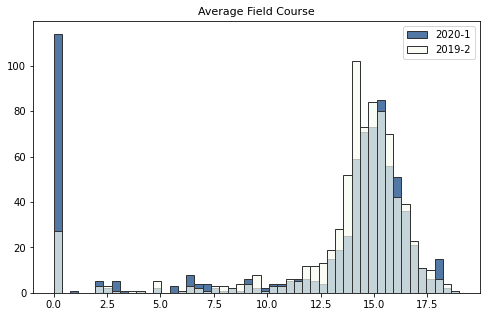

In [7]:
fig, ax = plt.subplots(figsize=(8,5))

ax = sns.histplot(data =base_educacion,
            x = 'ave_fc',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )


plt.legend(labels=['2020-1','2019-2'], frameon=True)
plt.title('Average Field Course', size=11)
plt.ylabel('')
plt.xlabel('')

### The distribution of grades does not show an increase in failed students but rather a significant dropout of students

Text(0.5, 0, 'Semester')

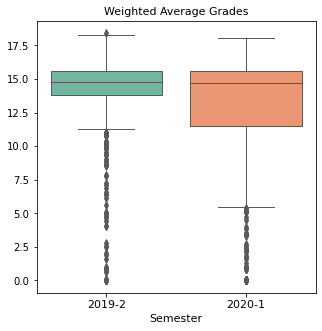

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="period", y="ave_total",
                 data=base_educacion,
                 linewidth= 1, palette="Set2")

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Weighted Average Grades', size=11)
plt.ylabel('')
plt.xlabel('Semester', size=11)

Text(0.5, 0, 'Semester')

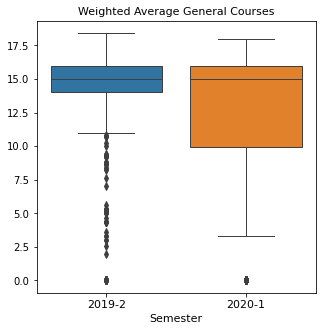

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="period", y="ave_gc",
                 data=base_educacion,
                 linewidth= 1)

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Weighted Average General Courses', size=11)
plt.ylabel('')
plt.xlabel('Semester', size=11)

Text(0.5, 0, 'Semester')

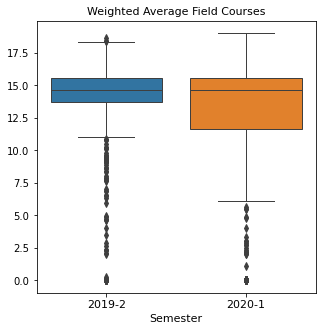

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x="period", y="ave_fc",
                 data=base_educacion,
                 linewidth= 1)

(ax.set_xticklabels(["2019-2", "2020-1"], size=11))
plt.title('Weighted Average Field Courses', size=11)
plt.ylabel('')
plt.xlabel('Semester', size=11)

### The greater dispersion of the notes is corroborated. No greater dispersion is identified between the weighted average in general or field course

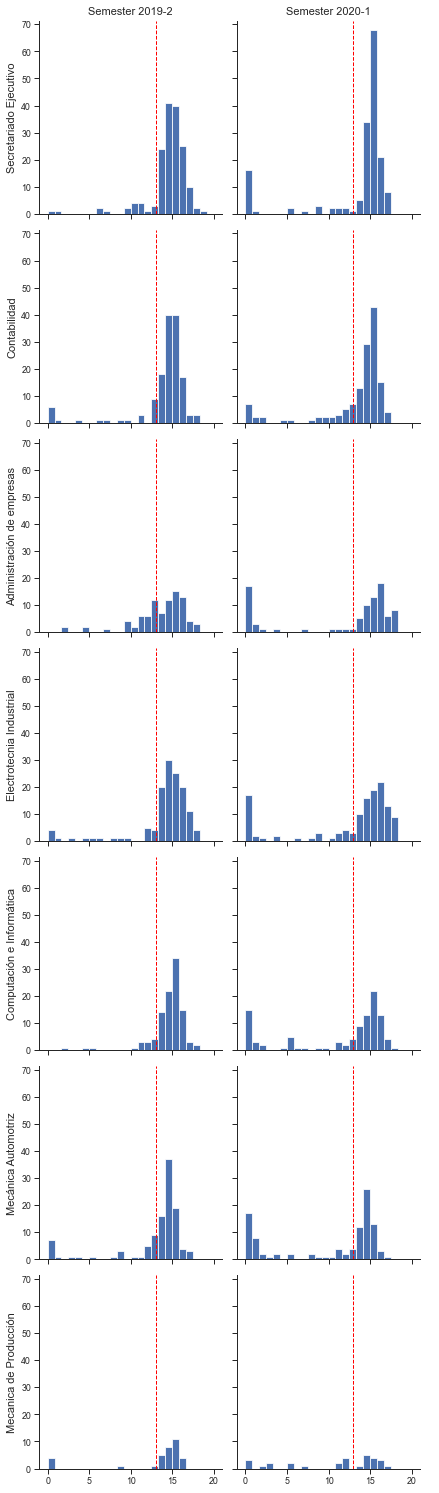

In [11]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="carrera", col="period", margin_titles=True)
grid.map(plt.hist, "ave_total", bins=np.linspace(0, 20, 25), color = 'b')

for ax in grid.axes.flat:
    ax.axvline(x=13,color='red', lw=1, ls='--')

grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrotecnia Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

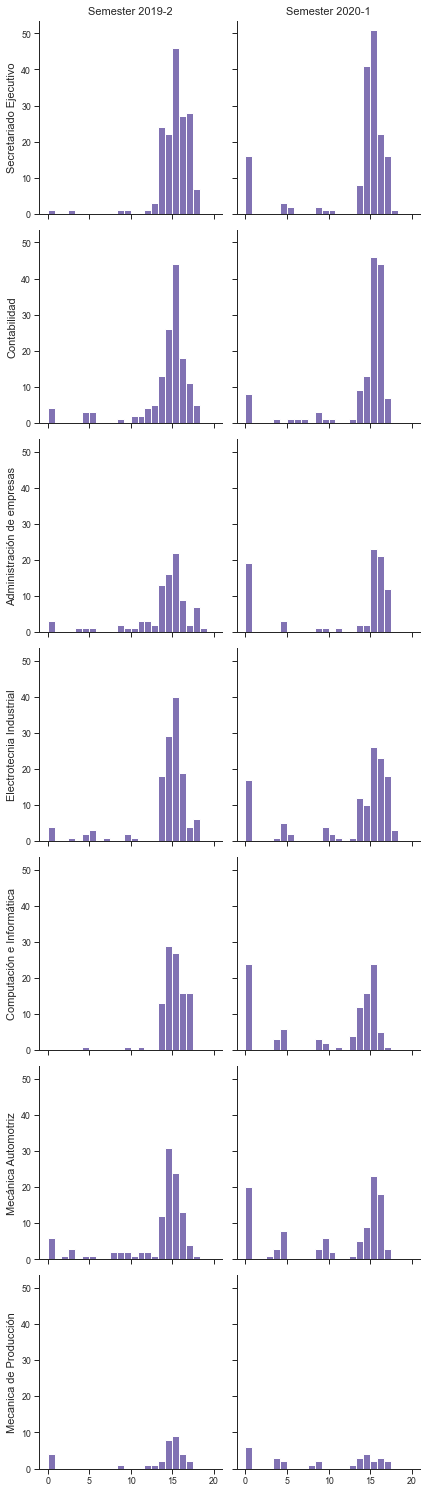

In [12]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="carrera", col="period", margin_titles=True)
grid.map(plt.hist, "ave_gc", bins=np.linspace(0, 20, 25), color = 'm', linewidth=1)

grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrotecnia Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

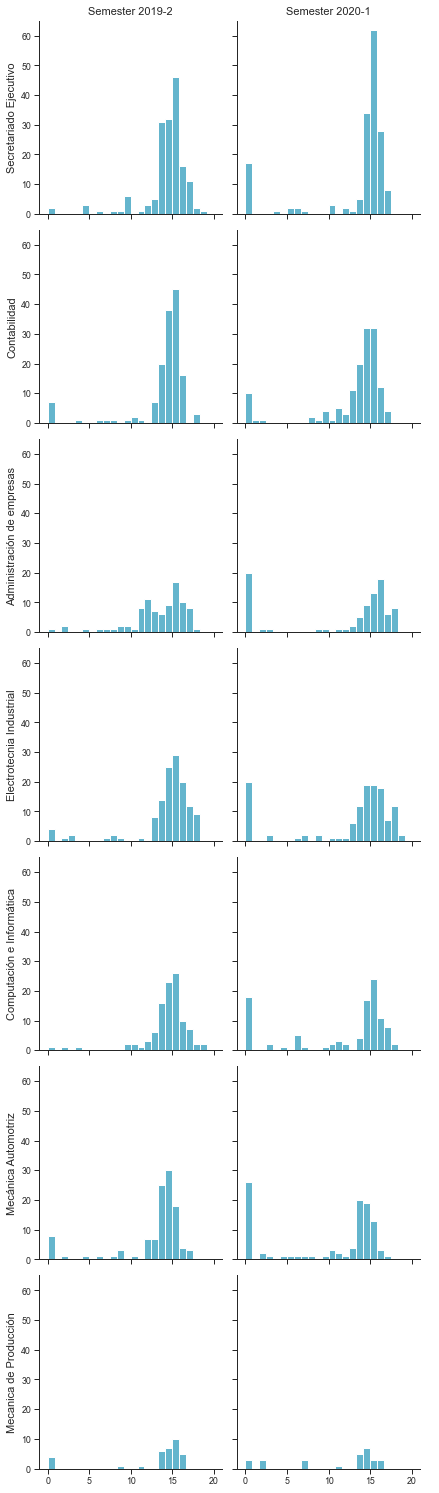

In [13]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="carrera", col="period", margin_titles=True)
grid.map(plt.hist,  "ave_fc", bins=np.linspace(0, 20, 25), color = 'c', linewidth=1)
grid.set_titles(row_template = ' ')

axes = grid.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrotecnia Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")

### An increase in student desertion in most careers but in Production Mechanics remains

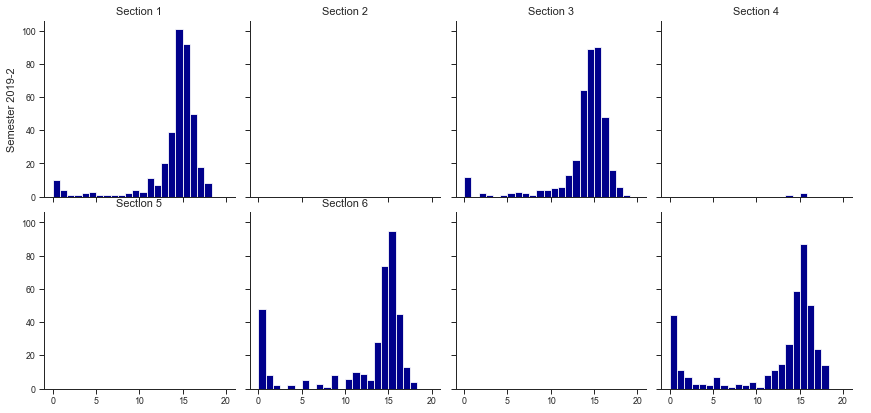

In [14]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="period", col="section", margin_titles=True)
grid.map(plt.hist, "ave_total", bins=np.linspace(0, 20, 25), color="darkblue")
grid.set_titles(row_template = ' ')

axes = grid.axes.flatten()
axes[0].set_title("Section 1", size=11)
axes[1].set_title("Section 2", size=11)
axes[2].set_title("Section 3", size=11)
axes[3].set_title("Section 4", size=11)
axes[4].set_title("Section 5", size=11)
axes[5].set_title("Section 6", size=11)

axes = grid.axes.flatten()
axes[0].set_ylabel("Semester 2019-2", size=11)
axes[6].set_ylabel("Semester 2020-1", size=11)
for ax in axes:
    ax.set_xlabel("")

### - Due to the fact that the admission of new students takes place once a year, even and odd sections divides the academic year: 1,3 & 5 sections in the first part and 2,4 & 6 in the second part of the year.

### - Lagging students in section 1 and 5 (2019-2) but  there are not lagging student in 2020-1 although there are failed students on previous semester. ¿why?

### - Semester 2020-1 only has 3 sections (1,3 and 5)

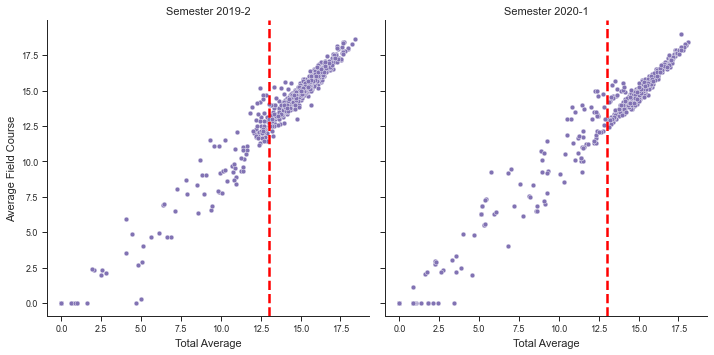

In [15]:
fg1 = sns.relplot(data=base_educacion, x="ave_total", y="ave_fc", col = 'period', kind="scatter", color = 'm')

for ax in fg1.axes.flat:
    ax.axvline(x=13,color='red', lw=2.5, ls='--')

axes = fg1.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

axes = fg1.axes.flatten()
axes[0].set_ylabel("Average Field Course", size=11)
for ax in axes:
    ax.set_xlabel("Total Average", size=11)

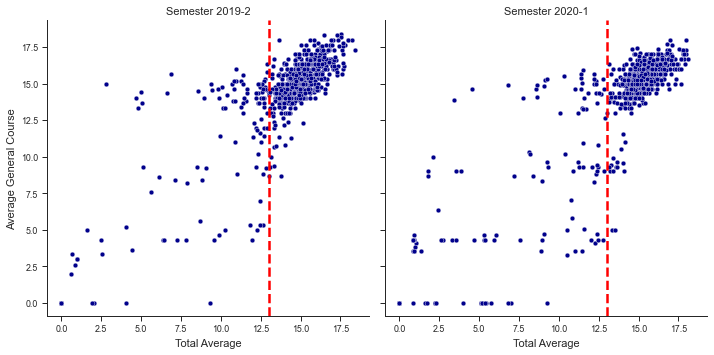

In [16]:
fg2 = sns.relplot(data=base_educacion, x="ave_total", y="ave_gc", col = 'period', kind="scatter", color = 'darkblue')

for ax in fg2.axes.flat:
    ax.axvline(x=13,color='red', lw=2.5, ls='--')

axes = fg2.axes.flatten()
axes[0].set_title("Semester 2019-2", size=11)
axes[1].set_title("Semester 2020-1", size=11)

axes = fg2.axes.flatten()
axes[0].set_ylabel("Average General Course", size=11)
for ax in axes:
    ax.set_xlabel("Total Average", size=11)

### The total average is determined by the field courses. A greater dispersion is evidenced in the average grades of general courses for the case of disapproved students.

Text(0.5, 0, '')

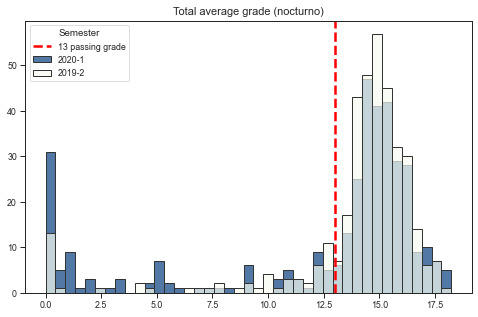

In [17]:
base1 = base_educacion[base_educacion['shift'] == "nocturno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'ave_total',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 passing grade','2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Total average grade (nocturno)', size=11)
plt.ylabel('')
plt.xlabel('')


Text(0.5, 0, '')

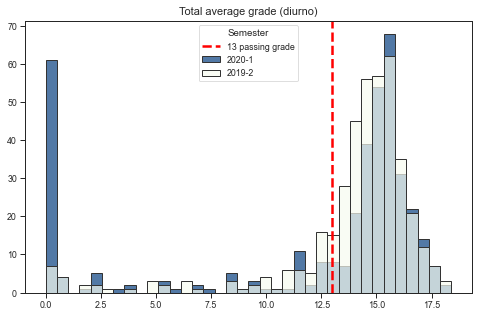

In [18]:
base1 = base_educacion[base_educacion['shift'] == "diurno"]

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data = base1,
            x = 'ave_total',
            alpha = 0.7,
            hue = 'period',
            palette='GnBu',
            edgecolor = "0.2",
            linewidth = 1
            )

plt.axvline(x=13,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['13 passing grade','2020-1','2019-2'],  title = "Semester", frameon=True)
plt.title('Total average grade (diurno)', size=11)
plt.ylabel('')
plt.xlabel('')

### There is evidence of a greater desertion of students in the diurno (day) shift. It is probably due to job search issues.

Text(0.5, 0, '')

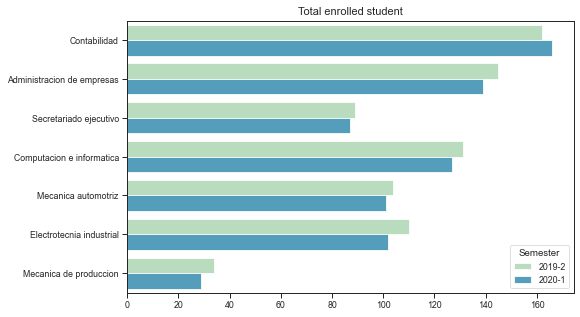

In [19]:
# enrolled student by carrer

fig, ax = plt.subplots(figsize=(8,5))

base =base_educacion[base_educacion.signup == 1]

ax = sns.countplot(y="carrera", hue="period", data=base, palette='GnBu')

plt.legend(labels=['2019-2','2020-1'],  title = "Semester", frameon=True)
plt.title('Total enrolled student', size=11)
plt.ylabel('')
plt.xlabel('')

### En todas la carreras hubo un incremento de alumnos matriculados para el 2020-1. Esto puede explicarse por la admisión anual. 

In [21]:
# enrolled student by carrer
base2 = base_educacion[(base_educacion.ave_total == 0)].groupby( [ 'carrera', 'period'] ).size().reset_index(name='Desertion student')
base2 

carrera  period  Desertion student
0   Administracion de empresas     1.0                  6
1   Administracion de empresas     2.0                  7
2    Computacion e informatica     1.0                  4
3    Computacion e informatica     2.0                 17
4                 Contabilidad     1.0                  1
5                 Contabilidad     2.0                 16
6     Electrotecnia industrial     1.0                  5
7     Electrotecnia industrial     2.0                 17
8          Mecanica automotriz     2.0                 15
9       Mecanica de produccion     1.0                  4
10      Mecanica de produccion     2.0                  3
11      Secretariado ejecutivo     2.0                 17

### Not student desertion 2019-2 in careers such us Macanica automotriz y decretariado ejecutivo. In absolutes terms, desertion students in Mecanica de produccion remains. 

In [22]:

base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 1)].groupby( [ 'carrera'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 1)].groupby( [ 'carrera', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'carrera')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4

carrera  num_disaproved  period  num_enrolled  \
0  Administracion de empresas               6     1.0           145   
1   Computacion e informatica               4     1.0           131   
2                Contabilidad               1     1.0           162   
3    Electrotecnia industrial               5     1.0           110   
4      Mecanica de produccion               4     1.0            34   

   percent_disaproved(%)  
0               4.137931  
1               3.053435  
2               0.617284  
3               4.545455  
4              11.764706

### Secretariado ejecutivo and mecánica automotriz do not show student desertion in 2019-2. The dropout of mecánica de producción is high even in the semester prior to 2020. 

In [68]:

base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'carrera'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 2)].groupby( [ 'carrera', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'carrera')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4.sort_values("percent_disaproved(%)")


carrera  num_disaproved  period  num_enrolled  \
0  Administracion de empresas               7     2.0           139   
2                Contabilidad              16     2.0           166   
5      Mecanica de produccion               3     2.0            29   
1   Computacion e informatica              17     2.0           127   
4         Mecanica automotriz              15     2.0           101   
3    Electrotecnia industrial              17     2.0           102   
6      Secretariado ejecutivo              17     2.0            87   

   percent_disaproved(%)  
0               5.035971  
2               9.638554  
5              10.344828  
1              13.385827  
4              14.851485  
3              16.666667  
6              19.540230

In [69]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

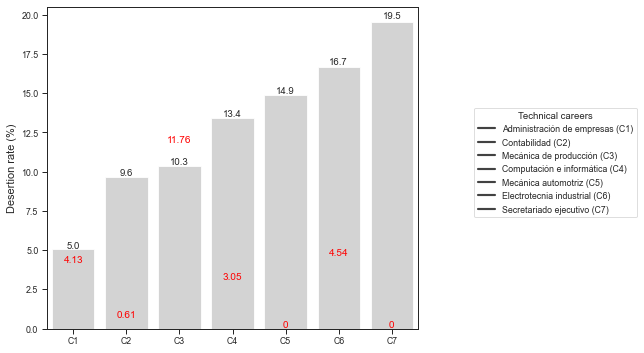

In [70]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x="carrera", y="percent_disaproved(%)", data=base4, color = 'lightgray',
                order=base4.sort_values('percent_disaproved(%)').carrera)

careers1 = ['C1','C2','C3', 'C4','C5', 'C6', 'C7']
careers2 = ['Administración de empresas (C1)','Contabilidad (C2)','Mecánica de producción (C3)', 'Computación e informática (C4)', 
           'Mecánica automotriz (C5)', 'Electrotecnia industrial (C6)', 'Secretariado ejecutivo (C7)']

(ax.set_xticklabels(careers1))
plt.xlabel('')
plt.ylabel('Desertion rate (%)', size=11)
plt.tight_layout()
plt.legend(title='Technical careers', loc='upper right', labels=careers2, bbox_to_anchor=(1.6, 0.7), ncol=1)
show_values(ax)

des_rate19 = [4.13,0.61, 11.76, 3.05, 0, 4.54,0]

j = 0
for i in des_rate19:
    ax.text(j,i+0.1,i, color = 'red', size = 10, ha='center')
    j = j +1

#"ch:.25"

###  - Desertion student rate 2019-2 in red
### - Careers that require the use of equipment and technology show a higher rate of student dropout (Mecanica automotriz y Electronica industrial). Also secretariado ejecutivo shows the highest reate of dropout students. 
### - Draw attention that Mecanica automotriz is in second place

In [73]:
base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'carrera','section'] ).size().reset_index(name='num_desertion')
base3 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'carrera'] ).size().reset_index(name='num_desertion_total')

base4 = pd.merge(base2,base3, on = 'carrera')
base4['percent_desertion(%)'] = ((base4['num_desertion']/base4['num_desertion_total'])*100).astype(float)
base4 = base4.pivot(index = 'carrera', columns = 'section', values = 'percent_desertion(%)')
base4 = base4.loc[['Administracion de empresas','Computacion e informatica','Contabilidad','Electrotecnia industrial','Mecanica automotriz','Mecanica de produccion','Secretariado ejecutivo']] 

# desertion details by section
base5 = pd.merge(base2,base3, on = 'carrera')
base5

carrera  section  num_desertion  num_desertion_total
0   Administracion de empresas      3.0              4                    7
1   Administracion de empresas      5.0              3                    7
2    Computacion e informatica      3.0              2                   17
3    Computacion e informatica      5.0             15                   17
4                 Contabilidad      3.0             11                   16
5                 Contabilidad      5.0              5                   16
6     Electrotecnia industrial      3.0              8                   17
7     Electrotecnia industrial      5.0              9                   17
8          Mecanica automotriz      3.0              9                   15
9          Mecanica automotriz      5.0              6                   15
10      Mecanica de produccion      3.0              1                    3
11      Mecanica de produccion      5.0              2                    3
12      Secretariado ejecutivo      3.0             13                   17
13      Secretariado ejecutivo      5.0              4                   17

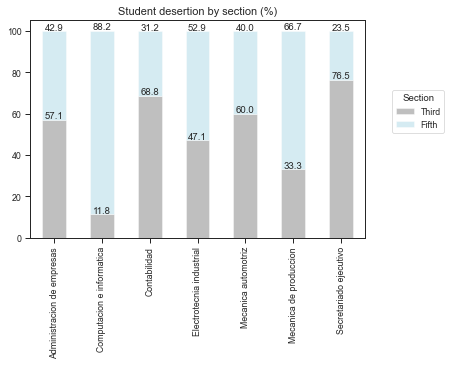

In [49]:
ax1 = base4.plot( kind='bar', stacked=True, title='', color = ['gray','lightblue'], alpha = 0.5)
plt.xlabel('')
plt.title('Student desertion by section (%)', size=11)
plt.ylabel('')
show_values(ax1)

plt.legend(title='Section', loc='upper right', labels = ['Third','Fifth'], bbox_to_anchor=(1.25, 0.7), ncol=1)


### older section, higher desertion rate on carrers that use technology and equipments

In [71]:
base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'carrera','shift'] ).size().reset_index(name='num_desertion')
base3 =  base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'carrera'] ).size().reset_index(name='num_desertion_total')
base4 = pd.merge(base2,base3, on = 'carrera')
base4['percent_desertion(%)'] = ((base4['num_desertion']/base4['num_desertion_total'])*100).astype(float)
base4 = base4.pivot(index = 'carrera', columns = 'shift', values = 'percent_desertion(%)')
base4 = base4.loc[['Administracion de empresas','Computacion e informatica','Contabilidad','Electrotecnia industrial','Mecanica automotriz','Mecanica de produccion','Secretariado ejecutivo',]] 

# desertion details by shift
base5 = pd.merge(base2,base3, on = 'carrera')
base5

carrera     shift  num_desertion  num_desertion_total
0   Administracion de empresas    diurno              4                    7
1   Administracion de empresas  nocturno              3                    7
2    Computacion e informatica    diurno             10                   17
3    Computacion e informatica  nocturno              7                   17
4                 Contabilidad    diurno             11                   16
5                 Contabilidad  nocturno              5                   16
6     Electrotecnia industrial    diurno             11                   17
7     Electrotecnia industrial  nocturno              6                   17
8          Mecanica automotriz    diurno             11                   15
9          Mecanica automotriz  nocturno              4                   15
10      Mecanica de produccion  nocturno              3                    3
11      Secretariado ejecutivo    diurno             14                   17
12      Secretariado ejecutivo  nocturno              3                   17

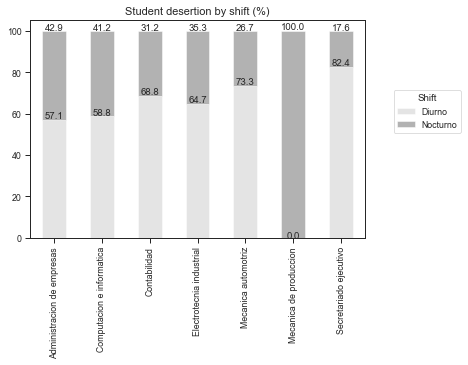

In [66]:
ax1 = base4.plot( kind='bar', stacked=True, title='', color = ['lightgray','gray'], alpha = 0.6)
plt.xlabel('')
plt.ylabel('')
plt.title('Student desertion by shift (%)', size=11)
show_values(ax1)

plt.legend(title='Shift', loc='upper right', labels = ['Diurno','Nocturno'], bbox_to_anchor=(1.3, 0.7), ncol=1)

### Larger desertion rate on diurno shift either for any thecnical career

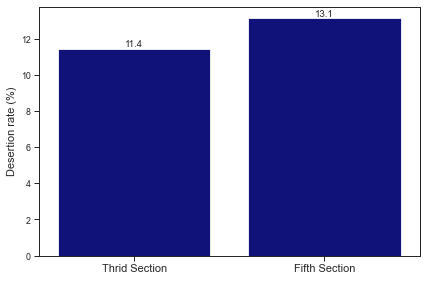

In [32]:
base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'section'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 2)].groupby( [ 'section', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'section')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4

ax = sns.barplot(x="section", y="percent_disaproved(%)", data=base4, color = 'darkblue',
                order=base4.sort_values('percent_disaproved(%)').section)

(ax.set_xticklabels([ "Thrid Section", "Fifth Section"], size=11))
plt.xlabel('')
plt.tight_layout()
plt.ylabel('Desertion rate (%)', size=11)
show_values(ax)

### Advanced semester students show a higher rate of student desertion

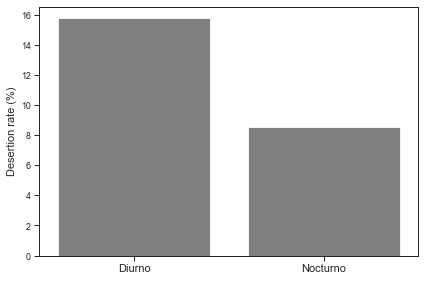

In [31]:
base2 = base_educacion[(base_educacion.ave_total == 0) & (base_educacion.period == 2)].groupby( [ 'shift'] ).size().reset_index(name='num_disaproved')
base3 =  base_educacion[(base_educacion.period == 2)].groupby( [ 'shift', 'period'] ).size().reset_index(name='num_enrolled')
base4 = pd.merge(base2,base3, on = 'shift')
base4['percent_disaproved(%)'] = ((base4['num_disaproved']/base4['num_enrolled'])*100).astype(float)
base4

ax = sns.barplot(x="shift", y="percent_disaproved(%)", data=base4, color = 'gray')

(ax.set_xticklabels(["Diurno", "Nocturno"], size=11))
plt.xlabel('')
plt.ylabel('Desertion rate (%)', size=11)
plt.tight_layout()